### 回归的一般方法
#### （1）收集数据：可以使用任何方法收集数据
#### （2）准备数据：回归需要数值型数据，标称型数据将被转换成二值型数据
#### （3）分析数据： 绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘再图上作为对比 
#### （4）训练算法：找到回归系数
#### （5）测试算法：使用$R^2$ 或者预测值和数据的拟合度，来分析模型的效果
#### （6）使用算法：使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签

#### 程序清单8-1 标准回归函数和数据导入函数

In [2]:
from numpy import *
def loadDataSet(fileName):    
    numFeat = len(open(fileName).readline().split('\t')) - 1 #特征值个数
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
def standRegres(xArr,yArr):
    xMat = mat(xArr);yMat = mat(yArr).T #xMat:200*2, yMat:1*200
    xTx = xMat.T*xMat #xTx:2*2
    #print(xTx)
    if linalg.det(xTx) == 0.0:  # 判断行列式是否为0 linalg.det()计算行列式，，需要判断矩阵行列式不为零，否则不能直接求逆。
        print("This matrix is singular,cannot do inverse") #这个矩阵是奇异的，不能做逆矩阵
        return
    ws = xTx.I * (xMat.T * yMat)  #xTx.I,矩阵的逆矩阵，也可以写成 ws = linalg.solve(xTx,xMat.T * yMat)
    #np.linalg.inv()：矩阵求逆
    #np.linalg.det()：矩阵求行列式（标量）
    #solve函数可以求解多元一次方程组
    return ws 


In [4]:
xArr,yArr = loadDataSet('ex0.txt')

In [5]:
#print(xArr)
shape(xArr)

(200, 2)

In [6]:
#print(yArr)
shape(yArr)

(200,)

In [7]:
ws=standRegres(xArr,yArr)

In [8]:
print(ws)

[[ 3.00774324]
 [ 1.69532264]]


In [116]:
xMat = mat(xArr)
#print(xMat)

In [10]:
yMat = mat(yArr)

In [11]:
yHat = xMat * ws

In [12]:
import matplotlib.pyplot as plt #--绘图
fig=plt.figure()
ax=fig.add_subplot(111)
#print(xMat[:,1].flatten())  #flatten是numpy.ndarray.flatten的一个函数，即返回一个一维数组。
#print(yMat.A[0])
#print(yMat.T[:,0].flatten().A[0])
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0]) #绘--原始数据


In [13]:
xCopy = xMat.copy()
xCopy.sort(0) #将点按照feature2升序排列,all featrue1=1.0
#print(xCopy)
yHat = xCopy * ws
ax.plot(xCopy[:,1],yHat)

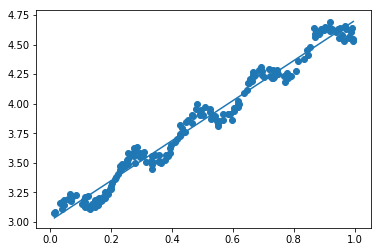

In [14]:
plt.show()

In [15]:
yHat = xMat * ws


In [16]:
corrcoef(yHat.T,yMat) #numpy的corrcoef (yEstimate , yActual) 来计算预测值和真实值的相关性。yHat和yMat的相关系数是0.98

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])


#### 局部加权线性回归（Locally Weighted Linear Regression,LWLR）
#### 给待预测点附近的每个点赋予一定的权重，该算法解出回归系数w的形式如下：
#### &emsp;&emsp;&emsp;&emsp; $ \hat{\omega}=（X^{T}WX）^{-1}X^{T}Wy $

#### LWLR 使用“核”（与支持向量机中的核类似）来对附近点赋予更高的权重。最常用高斯核，对用权重如下：
#### &emsp;&emsp;&emsp;&emsp; $ \omega (i,i)=exp\left ( \frac{\left | x^{^{(i)}}-x \right |}{-2k^{^{2}}} \right )$
#### k=0.5 时，大部分的数据都用于训练回归模型，k=0.01,仅有很少数的局部点被用于训练回归模型

#### 程序清单8-2 局部加权线性回归函数

In [17]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr);yMat=mat(yArr).T
    m = shape(xMat)[0]  #200 行
    weights = mat(eye((m))) #创建1对角阵
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2)) #权重大小以指数级衰减
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:  # 判断行列式是否为0 linalg.det()计算行列式，，需要判断矩阵行列式不为零，否则不能直接求逆。
        print("This matrix is singular,cannot do inverse") #这个矩阵是奇异的，不能做逆矩阵
        return
    ws = xTx.I * (xMat.T * (weights*yMat))
    return testPoint * ws

In [18]:
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [19]:
lwlr(xArr[0],xArr,yArr,1.0)  # 对单点进行估计
print(xArr[0])
print(lwlr(xArr[0],xArr,yArr,1.0))

[1.0, 0.067732]
[[ 3.12204471]]


In [20]:
yArr[0]

3.176513

In [21]:
print(lwlr(xArr[0],xArr,yArr,0.001)) 

[[ 3.20175729]]


In [22]:
yHat = lwlrTest(xArr,xArr,yArr,0.003) #k = 0.003

In [23]:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0) #rgsort函数返回的是数组值从小到大的索引值, #等价于argsort(xMat[:,1],0)
#print(srtInd)
xSort = xMat[srtInd][:,0,:] #200*2 #等价于xMat[srtInd.flatten().A[0]] 
#print(xSort)

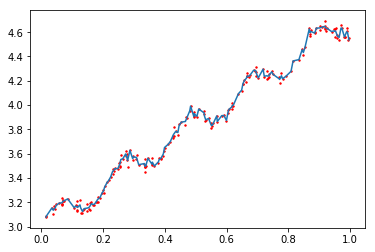

In [24]:
import matplotlib.pyplot as plt #--绘图
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd]) #绘--预测数据
ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s=2,c='red')#绘--原始数据
plt.show()

In [25]:
yHat = lwlrTest(xArr,xArr,yArr,0.01)#k = 0.01

In [26]:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0) #rgsort函数返回的是数组值从小到大的索引值, #等价于argsort(xMat[:,1],0)
#print(srtInd)
xSort = xMat[srtInd][:,0,:] #200*2 #等价于xMat[srtInd.flatten().A[0]] 
#print(xSort)

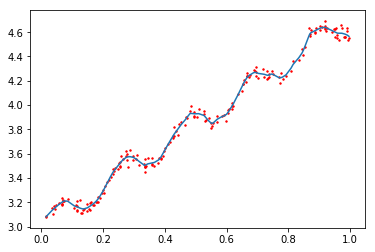

In [27]:
import matplotlib.pyplot as plt #--绘图
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd]) #绘--预测数据
ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s=2,c='red')#绘--原始数据
plt.show()

In [28]:
yHat = lwlrTest(xArr,xArr,yArr,1.0)#k = 1.0

In [29]:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0) #rgsort函数返回的是数组值从小到大的索引值, #等价于argsort(xMat[:,1],0)
#print(srtInd)
xSort = xMat[srtInd][:,0,:] #200*2 #等价于xMat[srtInd.flatten().A[0]] 
#print(xSort)

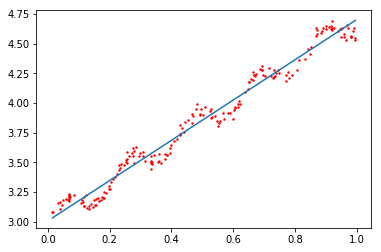

In [30]:
import matplotlib.pyplot as plt #--绘图
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd]) #绘--预测数据
ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s=2,c='red')#绘--原始数据
plt.show()

#### 预测鲍鱼年龄

In [31]:
def rssError(yArr,yHatArr):
    return((yArr-yHatArr)**2).sum()

In [32]:
abX,abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [33]:
rssError(abY[0:99],yHat01.T)

56.825235689728842

In [34]:
rssError(abY[0:99],yHat1.T)

429.89056187006514

In [35]:
rssError(abY[0:99],yHat10.T)

549.11817088264513

In [36]:
yHat01 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

In [37]:
rssError(abY[100:199],yHat01.T)

41317.161723642595

In [38]:
rssError(abY[100:199],yHat1.T)

573.52614418976702

In [39]:
rssError(abY[100:199],yHat10.T)

517.57119053875977

In [40]:
ws = standRegres(abX[0:99],abY[0:99])
yHat = mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A) # .A将矩阵转化为数组

518.63631532496379

#### 岭回归使用了单位矩阵乘以常量$\lambda $,其中单位矩阵I，可以看到值1贯穿整个对角线，其余元素全是0，形象地在0构成的平面上有一天1组成的岭，回归系数计算公式
#### &emsp;&emsp;&emsp;&emsp; $ \hat{\omega}=（X^{T}X+\lambda I）^{-1}X^{T}y $
#### 岭回归最先用来处理特征数多于样本的情况，现在也用于再估计总加入偏差，从而得到更好的估计，这里通过引入$\lambda $来限制所有$\omega$之和，通过引入惩罚项，能够减少不重要的参数，这个技术在统计学中也叫做缩减（shrinkage）

#### 程序清单8-3 岭回归

In [41]:
def ridgeRegres(xMat,yMat,lam = 0.2):
    xTx = xMat.T*xMat #xTx:2*2
    denom = xTx + eye(shape(xMat)[1])*lam    
    if linalg.det(xTx) == 0.0:  
        print("This matrix is singular,cannot do inverse") 
        return
    ws = denom.I * (xMat.T * yMat)
    return ws 

In [42]:
def ridgeTest(xArr,yArr):
    xMat = mat(xArr);yMat=mat(yArr).T
    yMean = mean(yMat,0)  #数据标准化
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    xMat = (xMat-xMeans)/xVar#所有特征减去各自的均值并除以方差
    numTestPts = 30#取30个不同的lambda调用函数,30个不同的lambda值进行测试，选最优
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:] = ws.T
    return wMat


In [43]:
ridgeWeights = ridgeTest(abX,abY)

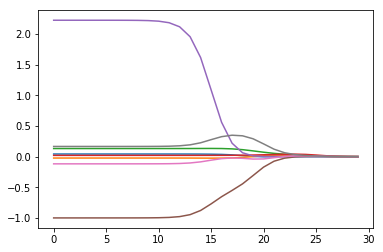

In [44]:
 #缩减效果图
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

### 前向逐步回归算法的伪代码
####  数据标准化，使其分布满足0均值和单位方差
####  在每轮迭代过程中：
####  &emsp;&emsp;设置当前最小误差lowestError为正无穷：
#### &emsp;&emsp; 对每个特征：
#### &emsp;&emsp; &emsp;&emsp; 增大或缩小：
#### &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 改变一个系数得到一个新的W
#### &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 计算新W小的误差
#### &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 如果误差Error小于当前最小误差lowestError：设置Wbest等于当前的W
#### &emsp;&emsp; 如果所有向量都没被优化，增加迭代数目，继续下一次循环

#### 程序清单8-4 前向逐步线性回归

In [45]:
def regularize(xMat):#regularize 标准化
    inMat = xMat.copy()
    inMeans= mean(inMat,0)
    inVar = var(inMat,0)
    inMat = (inMat - inMeans)/inVar
    return inMat

def stageWise(xArr,yArr,eps = 0.01,numIt=100):
    xMat = mat(xArr);yMat=mat(yArr).T
    yMean = mean(yMat,0)  #数据标准化
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = inf;
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j]+=eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [46]:
xArr, yArr = loadDataSet('abalone.txt')

In [117]:
#stageWeights=stageWise(xArr,yArr,0.001,5000)

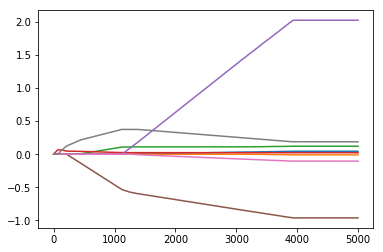

In [49]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(stageWeights)
plt.show()

### 用回归法预测乐高套装的价格
#### （1）收集数据：用Google Shopping的API收集数据
#### （2）准备数据：返回的JSON数据中抽取价格
#### （3）分析数据： 可视化并观察数据
#### （4）训练算法：构建不同的模型，采用逐步线性回归和直接的线性回归模型
#### （5）测试算法：使用交叉验证测试不同的模型，来分析哪个效果最好
#### （6）使用算法：这次练习的目标就是生成数据模型

In [118]:
#原文中通过Google提供的API来抓取价格，但由于现在访问不了Google,所以，直接通过文本给的html文件直接读取价格信息。然后进一步进行分析预测。


#### 程序清单8-5 购物信息的获取函数

In [73]:
from bs4 import BeautifulSoup
import numpy as np
import random
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
        soup = BeautifulSoup(html)
        i = 1
        # 根据HTML页面结构进行解析
        currentRow = soup.find_all('table', r = "%d" % i)
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = "%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r = "%d" % i)
     


In [74]:
#分别抓取各网页数据
def setDataCollect(retX, retY):
    scrapePage(retX, retY, 'lego8288.html', 2006, 800, 49.99)             
    scrapePage(retX, retY, 'lego10030.html', 2002, 3096, 269.99)          
    scrapePage(retX, retY, 'lego10179.html', 2007, 5195, 499.99)             
    scrapePage(retX, retY, 'lego10181.html', 2007, 3428, 199.99)               
    scrapePage(retX, retY, 'lego10189.html', 2008, 5922, 299.99)                
    scrapePage(retX, retY, 'lego10196.html', 2009, 3263, 249.99)

In [75]:
lgX = [];lgY=[]
setDataCollect(lgX,lgY)

E:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file E:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
商品 #4 没有出售
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
商品 #11 没有出售
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
商品 #4 没有出售
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990000	750.000000
商品 #16 没有出售
200

In [77]:
shape(lgX)

(63, 4)

In [119]:
#print(lgX)

In [81]:
lgX1 = mat(ones((63,5)))

In [82]:
lgX1[:,1:5] = mat(lgX)

In [83]:
lgX[0]

[2006, 800, 0.0, 49.99]

In [84]:
lgX1[0]

matrix([[  1.00000000e+00,   2.00600000e+03,   8.00000000e+02,
           0.00000000e+00,   4.99900000e+01]])

In [85]:
ws = standRegres(lgX1,lgY)

In [86]:
ws

matrix([[  5.53199701e+04],
        [ -2.75928219e+01],
        [ -2.68392234e-02],
        [ -1.12208481e+01],
        [  2.57604055e+00]])

In [88]:
lgX1[0]*ws

matrix([[ 76.07418847]])

In [89]:
ws

matrix([[  5.53199701e+04],
        [ -2.75928219e+01],
        [ -2.68392234e-02],
        [ -1.12208481e+01],
        [  2.57604055e+00]])

In [91]:
lgX1[-1]*ws

matrix([[ 431.17797665]])

In [92]:
lgX1[43]*ws

matrix([[ 516.20733099]])

#### 程序清单8-6 交叉验证测试岭回归

In [113]:

def crossValidation(xArr,yArr,numVal = 10):
    m = len(yArr)
    indexList = list(range(m))  #代码这里要修改
    #创建numVal*30的误差矩阵
    ##30的由来：ridgeTest()使用了30个不同的lambda值来创建不同的回归系数，即numTestPts = 30
    errorMat = zeros((numVal,30))
    for i in range(numVal):
        #创建训练集和测试集容器
        trainX = [];trainY = []
        testX = [];testY =[]
         #打乱索引顺序，实现随机选取训练集和测试集数据点
        random.shuffle(indexList)
        #数据分为训练集和测试集，#90%训练+10%测试
        for j in range(m):
            if j < m*0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)#获得30组ws向量
        for k in range(30):
            #用训练时的参数将测试数据标准化
            matTestX = mat(testX);
            matTrainX = mat(trainX)
            meanTrain = mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTestX - meanTrain)/varTrain
            yEst = matTestX * mat(wMat[k,:]).T +mean(trainY)
            errorMat[i,k]=rssError(yEst.T.A,array(testY))
    #计算不同岭回归ws下errorMat的平均值，观察平均性能  
    #meanErrors:1*30矩阵
    meanErrors=mean(errorMat,0)
    minMean = float(min(meanErrors))
     #nonzero(meanErrors==minMean)返回的是误差最小的索引，因此bestWeights为误差最小的那个w向量
    bestWeights = wMat[nonzero(meanErrors == minMean)]
     #岭回归使用了数据标准化，而standRegres没有，为了比较可视化，因此需要将数据还原
    #标准化后 Xreg = (x-meanX)/var(x)，预测y=Xreg*w+meanY
    #因此，利用未标准化的x来计算y= x*w/var(x) - meanX*w/var(x) +meanY
    #其中unReg=w/var
    xMat = mat(xArr)
    yMat = mat(yArr).T
    meanX = mean(xMat,0)
    varX = var(xMat,0)
    unReg = bestWeights / varX
    #数据还原
    print("the best model from Ridge Regression is:\n",unReg)
     #特别注意这里的sum函数，一定是np.sum,因为一般的sum只能对list求和，而这里的参数是matrix
    print("with constant term:",-1*sum(multiply(meanX,unReg))+mean(yMat))
          

In [114]:
crossValidation(lgX,lgY,10)

the best model from Ridge Regression is:
 [[ -3.34922409e+01   4.90836452e-04   1.90316935e+01   2.08853435e+00]]
with constant term: 67188.4053238


In [115]:
ridgeTest(lgX,lgY)

array([[ -1.45288906e+02,  -8.39360442e+03,  -3.28682450e+00,
          4.42362406e+04],
       [ -1.46649725e+02,  -1.89952152e+03,  -2.80638599e+00,
          4.27891633e+04],
       [ -1.44450432e+02,   8.55488076e+02,  -1.35089285e+00,
          4.00885735e+04],
       [ -1.37402474e+02,   1.64217093e+03,   1.95840783e+00,
          3.44932120e+04],
       [ -1.24750588e+02,   1.44326171e+03,   7.62540167e+00,
          2.50647592e+04],
       [ -1.10234679e+02,   8.81842164e+02,   1.40617304e+01,
          1.43874420e+04],
       [ -9.96484167e+01,   4.17805568e+02,   1.87140361e+01,
          6.66770425e+03],
       [ -9.40345090e+01,   1.71289137e+02,   2.10844952e+01,
          2.71206176e+03],
       [ -9.11400659e+01,   6.57287394e+01,   2.20487105e+01,
          1.03800465e+03],
       [ -8.86246985e+01,   2.45452725e+01,   2.23181664e+01,
          3.87564774e+02],
       [ -8.41447674e+01,   9.05861459e+00,   2.21495534e+01,
          1.43313895e+02],
       [ -7.44804291e